In [1]:
!pip install -q trl peft datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Install PyTorch with CUDA 11.8 (for T4 GPU)
!pip install -q torch==2.1.0+cu118 torchvision==0.15.0+cu118 torchaudio==2.1.0 -f https://download.pytorch.org/whl/torch_stable.html

# Install xformers for memory-efficient attention
!pip install -q xformers

# Install unsloth
!pip install -q unsloth


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 704.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00
ERROR: Cannot install torch==2.1.0+cu118 and torchvision==0.15.0+cu118 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━

In [3]:
import torch
import unsloth
print("Device: ",torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
print(unsloth.__version__)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch SmolVLMForConditionalGeneration forward function.
🦥 Unsloth Zoo will now patch everything to make training faster!
Device:  Tesla T4
2025.4.1


In [4]:
import unsloth
import torch
import datasets as load_dataset
from trl import SFTTrainer
from unsloth import is_bf16_supported,FastLanguageModel
from transformers import TrainingArguments
import wandb

In [5]:
# login to to wandb and create a project
from google.colab import userdata
api = userdata.get('WB_API')
wandb.login(key=api)
run = wandb.init(
      project="Movie-Review-Sentiment-Anlysis",
      job_type="training",
       anonymous="allow"
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: haseebmanzoor1511 (haseebmanzoor1511-comsats-university-islamabad) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [6]:
from datasets import load_dataset
dataset = load_dataset("imdb", split="train[:10000]")

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame(dataset)
data.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


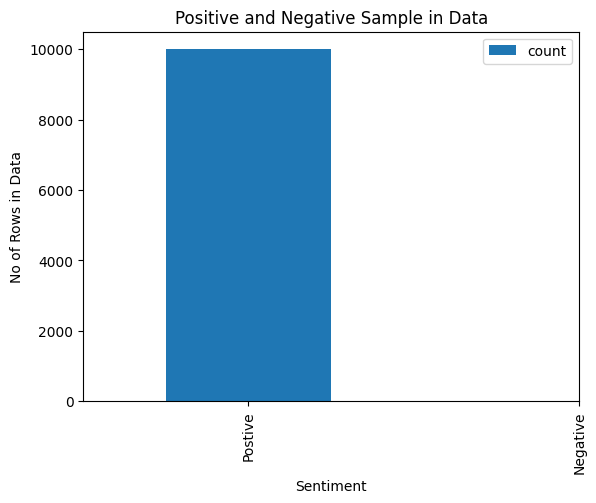

In [8]:
data["label"].value_counts().plot(kind="bar")
plt.xticks(ticks=[0,1],labels=["Postive","Negative"])
plt.title("Positive and Negative Sample in Data")
plt.xlabel("Sentiment")
plt.ylabel("No of Rows in Data")
plt.legend()
plt.show()

In [9]:
print("labels: ",data["label"].unique())

print("Shape of data: ",data.shape)

labels:  [0]
Shape of data:  (10000, 2)


In [11]:
model,tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/gemma-2b",    #
    max_length=2048,
    dtype=None,
    load_in_4bit=True,
)

==((====))==  Unsloth 2025.4.1: Fast Gemma patching. Transformers: 4.51.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [12]:
lora = FastLanguageModel.get_peft_model(
    model=model,
    r=8,
    target_modules=["q_proj","k_proj","v_proj","o_proj","gate_proj","up_proj","down_proj"],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing=True,
    random_state=3333
)


Unsloth 2025.4.1 patched 18 layers with 18 QKV layers, 18 O layers and 18 MLP layers.


In [13]:
prompt = """
You are a movie review analyzer.

Given the following review, perform three tasks:
1. Display the original review text.
2. Predict whether the sentiment is Positive or Negative.
3. Provide a brief explanation for your prediction.

Review:
{review_text}

Your response format must strictly follow:

text = {review_text}
sentiment = [Positive/Negative]
explanation = [Short explanation why the sentiment was chosen]
"""

In [14]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 10000
})

In [15]:
def format_imdb_prompt(example):
    label = "Positive" if example["label"] == 1 else "Negative"
    input = prompt.format(review_text=example["text"])
    output = f"text = {example['text']}\n sentiment = {label}\n explanation = [Your explanation here]"
    return {
        "input":input,
        "output":output
    }

dataset = dataset.map(format_imdb_prompt)


Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [16]:
# tokenization

def tokenization(example):
  input = tokenizer(example["input"],truncation=True, max_length=2048, padding="max_length")
  output = tokenizer(example["output"],truncation=True, max_length=2048, padding="max_length")
  input["labels"]=output["input_ids"]
  return input

dataset = dataset.map(tokenization,batched=True)

dataset.set_format(type="pt",columns=["input_ids","attention_mask","labels"])

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(model=model,
                                       tokenizer=tokenizer)

In [17]:
split = dataset.train_test_split(test_size=0.2)
train_dataset = split["train"]
eval_dataset = split["test"]

In [18]:
trainer = SFTTrainer(
    model = lora,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
    data_collator = None,
    args=TrainingArguments(
        output_dir = "/content/imdb/checkpoint",
        save_strategy="epoch",
        per_device_train_batch_size=6,
        per_device_eval_batch_size=6,
        eval_strategy="epoch",
        num_train_epochs=3,
        gradient_accumulation_steps=4,
        fp16 = True,      # Use fp16 directly
        bf16 = False,     # No bf16 for T4 GPU
        logging_steps=500,
        seed=3433

    )

)


In [ ]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 8,000 | Num Epochs = 3 | Total steps = 999
O^O/ \_/ \    Batch size per device = 6 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (6 x 4 x 1) = 24
 "-____-"     Trainable parameters = 9,805,824/2,000,000,000 (0.49% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Unsloth: Will smartly offload gradients to save VRAM!


Epoch,Training Loss,Validation Loss


In [ ]:
model = model.save_pretrained("/content/imdb/model")
tokenizer=tokenizer.save_pretrained("/content/imdb/tokenizer")

In [ ]:
model = "/content/imdb/model"
tokenizer = "/content/imdb/tokenizer"
def inference(review,model,tokenizer):
  input = tokenizer(review,return_tensor="pt").to("cuda")
  output = model.generate(**input,max_new_token=128,use_cache=True)
  output = tokenizer.batch_decode(output)

print(inference(model,tokenizer,text=input("Enter Review: ")))
